In [1]:
import pandas as pd
import numpy as np
import statistics
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import copy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import recall_score, precision_score
from sklearn.cross_validation import KFold, train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,precision_recall_fscore_support
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import sklearn.tree as tree
from IPython.display import Image


### Reading the CSV file into a Pandas DataFrame and calculating aggregate functions for the Target column

In [2]:
df = pd.read_csv('responses.csv')

In [3]:
df['Empathy'].describe()

count    1005.000000
mean        3.858706
std         1.131730
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Empathy, dtype: float64

### Find and drop the rows with NaN values in Empathy column

In [4]:
df2 = df['Empathy'].isnull().sum()
print("Number of rows with NaN values to be dropped from Empathy column:",df2)

Number of rows with NaN values to be dropped from Empathy column: 5


In [5]:
df.dropna(subset = ["Empathy"], inplace=True)

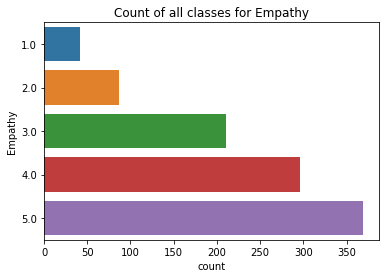

In [6]:
ax = plt.axes()
ax.set_title("Count of all classes for Empathy")
qw = sns.countplot(y = 'Empathy', data = df,ax = ax)


### Find all the integer and the categorical columns

In [7]:
int_columns = []
categorical_columns = []
for i in df.columns:
    if (df[i].dtype!='object'):
        int_columns.append(i)
        
        
for i in df.columns:
    if (df[i].dtype=='object'):
        categorical_columns.append(i)
print ('Number of integer features:',len(int_columns))
print('Number of categorical features:',len(categorical_columns))

Number of integer features: 139
Number of categorical features: 11


### For categorical columns: Fill NaN values with mode of Column and Label Encode them

In [8]:
le = LabelEncoder()
for i in categorical_columns:
    abc = np.array(df[i])
    x = statistics.mode(abc)
    xyz = df[i].fillna(x)
    aqws = le.fit_transform(xyz)
    df[i] = aqws




### Fill all the Null values in integer columns with mean values

In [9]:
means = df.mean(axis=0)
df.fillna(means, inplace=True)

### Find the Correlation of each column with Target column

In [10]:
def correlation(target, df):
    df1 = copy.deepcopy(df)
    #correlation_values = correlation_coeff("Empathy",df)
    d1 = {}
    for i in df.columns:
        #label.append(i)
        corref = (np.corrcoef(df[i],df[target])[0,1])
        #value.append(corref)
        d1[i] = corref
    return d1

In [11]:
cooer = correlation('Empathy',df)
print("Correlation value dictionary (Key: column name, value = correlation_value)\n",cooer)

Correlation value dictionary (Key: column name, value = correlation_value)
 {'Music': 0.10261464441530778, 'Slow songs or fast songs': -0.093850068753730337, 'Dance': 0.059236846349659637, 'Folk': 0.11325142179902035, 'Country': 0.04142510997347932, 'Classical music': 0.030151531898808891, 'Musical': 0.12738013410019788, 'Pop': 0.090840115588922424, 'Rock': 0.065853235404870092, 'Metal or Hardrock': -0.017659908297109082, 'Punk': -0.0033316127935862552, 'Hiphop, Rap': -0.06371477717224075, 'Reggae, Ska': 0.057525314036358903, 'Swing, Jazz': 0.097147808099690883, 'Rock n roll': 0.074356975828904034, 'Alternative': 0.088213404247655627, 'Latino': 0.1916931897943949, 'Techno, Trance': 0.018873139581926109, 'Opera': 0.025305617059795102, 'Movies': 0.0047548443692299229, 'Horror': -0.043486069444232639, 'Thriller': -0.012163126178255022, 'Comedy': 0.11316377803936015, 'Romantic': 0.1507359318761414, 'Sci-fi': -0.036265822445770195, 'War': -0.064382560215851092, 'Fantasy/Fairy tales': 0.1984

### Obtain the Top N feature columns based on correlation values

In [12]:
from collections import OrderedDict
d = OrderedDict(sorted(cooer.items(), key=lambda t: t[1],reverse=True))
#print(d)
i=0
lad = []
count=0
for key,value in d.items():
    lad.append(key)
    
lad1 = lad[1:11]
lad2 = lad[1:21]
lad = lad1
lad_main = lad2 


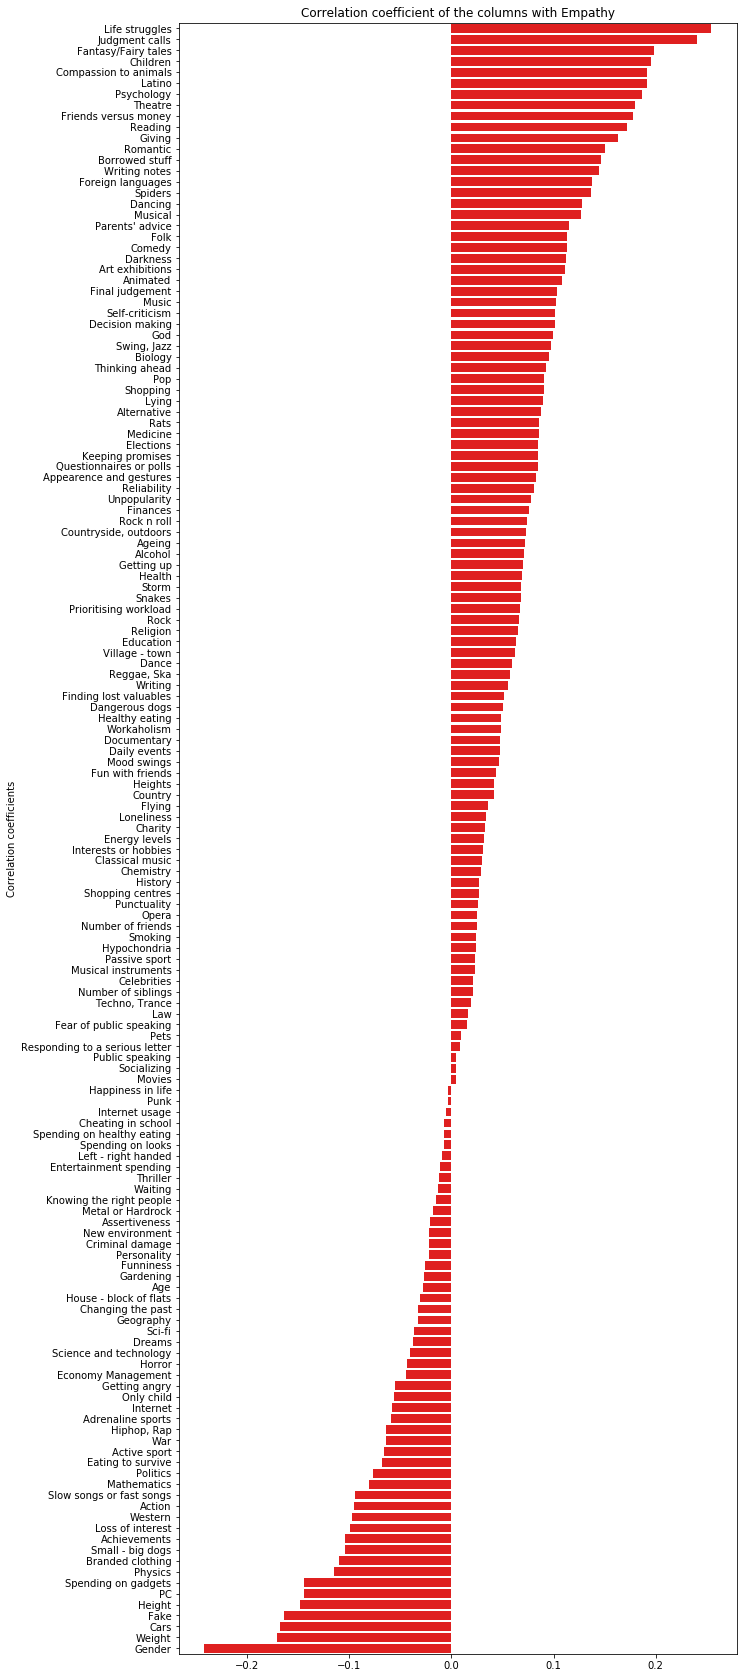

In [13]:
cooer1 = copy.deepcopy(d)
cooer1.pop('Empathy')
fig, ax = plt.subplots(figsize= (10,30))
ax.set_title("Correlation coefficient of the columns with Empathy")
ax.set_ylabel("Correlation coefficients")
sns.barplot(x=list(cooer1.values()), y=list(cooer1.keys()),  ax = ax,color = 'r')

### Create a dataframe with just the relevant features in one and another with just target label for Training and Testing

In [14]:
X = copy.deepcopy(df[lad])
X1 = copy.deepcopy(df[lad_main])
Y = df["Empathy"]

# Baseline Model

In [15]:
A = df.drop(['Empathy'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(A, Y, test_size=.3, random_state=100)

In [16]:
clf = LinearSVC(multi_class = 'ovr',random_state = 42)
clf.fit(x_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

**Accuracy and Classifiation Report**

In [17]:
pred = clf.predict(x_test)
acc3 = np.mean(pred==y_test)
print("\n\nBaseline Model\n")
print("Basline accuracy:",acc3,"\n") 
print(classification_report(pred,y_test))



Baseline Model

Basline accuracy: 0.41059602649 

             precision    recall  f1-score   support

        1.0       0.20      0.67      0.31         3
        2.0       0.10      0.33      0.15         6
        3.0       0.01      0.33      0.03         3
        4.0       0.57      0.29      0.38       153
        5.0       0.61      0.55      0.58       137

avg / total       0.57      0.41      0.46       302



### *Perform Train Test split of 30% for training and testing*

# Proposed model with Correlations only

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=100)

**Linear SVM classifier with one vs rest method for multi-class classification**

In [19]:

clf = LinearSVC(multi_class = 'ovr',random_state = 100)
clf.fit(x_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=100, tol=0.0001,
     verbose=0)

**Accuracy and Classification report**

In [20]:

pred = clf.predict(x_test)
acc = np.mean(pred==y_test)
print("\n\nProposed Model with correlations:\n")
print("accuracy of proposed model:",acc) 
print("\nclassification report:\n",classification_report(pred,y_test))



Proposed Model with correlations:

accuracy of proposed model: 0.493377483444

classification report:
              precision    recall  f1-score   support

        1.0       0.00      0.00      0.00         0
        2.0       0.00      0.00      0.00         3
        3.0       0.33      0.41      0.37        58
        4.0       0.30      0.36      0.33        64
        5.0       0.83      0.58      0.68       177

avg / total       0.61      0.49      0.54       302



# Proposed model with standard scaling

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=100)

### Standard Scaling
 - Standarizes the features by modifying the values such that their mean is 0 and variance is 1

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
#print(x_train)
x_test=scaler.transform(x_test)

**Linear SVM classifier with One VS Rest method for multi-class classification**

In [23]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

clf = LinearSVC(multi_class = 'ovr',random_state = 42)
clf.fit(x_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

**Accuracy and Classification Report**

In [24]:
pred = clf.predict(x_test)
acc1 = np.mean(pred==y_test)
print("\n\nProposed Model with correlations and Standard Scaling:\n")
print("\naccuracy of proposed model:",acc1)
print("\nclassification report:\n",classification_report(pred,y_test))



Proposed Model with correlations and Standard Scaling:


accuracy of proposed model: 0.503311258278

classification report:
              precision    recall  f1-score   support

        1.0       0.00      0.00      0.00         0
        2.0       0.00      0.00      0.00         3
        3.0       0.32      0.43      0.37        54
        4.0       0.35      0.36      0.36        75
        5.0       0.83      0.60      0.70       170

avg / total       0.61      0.50      0.55       302



# Proposed model with GridsearchCV for hyperparameter tuning

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=100)

### GridsearchCV
   - SVM classifier as base estimator
   - Paramters tuned include Kernel and penalty C
   - 5 fold cross validation for tuning

In [26]:
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB

clf = SVC(random_state = 21)

KF = KFold(len(x_train), n_folds=5)
param_grid = {'kernel':('linear', 'rbf'),'C':[0.0001,0.003,.001,.01,.03,.1,.3,1,3,10]}
grsearch = GridSearchCV(clf, param_grid=param_grid, cv=KF)
grsearch.fit(x_train,y_train)
clf = SVC(C=grsearch.best_params_['C'],kernel = grsearch.best_params_['kernel'])
clf.fit(x_train,y_train)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

**Accuracy and Classification Report**

In [27]:
pred = clf.predict(x_test)
acc2 = np.mean(pred==y_test)
print("\n\nProposed Model with correlations and GridsearchCV:\n")
print("\naccuracy of proposed model:",acc2)
print("\nclassification report:\n",classification_report(pred,y_test))



Proposed Model with correlations and GridsearchCV:


accuracy of proposed model: 0.509933774834

classification report:
              precision    recall  f1-score   support

        1.0       0.00      0.00      0.00         0
        2.0       0.00      0.00      0.00         0
        3.0       0.31      0.41      0.35        54
        4.0       0.51      0.36      0.42       107
        5.0       0.76      0.66      0.70       141

avg / total       0.59      0.51      0.54       302



# Proposed model with Top 20 Features

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X1, Y, test_size=.3, random_state=100)

### Standard Scaling and GridsearchCV hyperparameter tuning

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
#print(x_train)
x_test=scaler.transform(x_test)

In [30]:
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB

clf = SVC(random_state = 7)

KF = KFold(len(x_train), n_folds=5)
param_grid = {'kernel':('linear', 'rbf'),'C':[0.0001,0.003,.001,.01,.03,.1,.3,1,2,3,5,10]}
grsearch = GridSearchCV(clf, param_grid=param_grid, cv=KF)
grsearch.fit(x_train,y_train)
clf = SVC(C=grsearch.best_params_['C'],kernel = grsearch.best_params_['kernel'])
clf.fit(x_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

**Accuracy and Classification_report**

In [31]:
pred = clf.predict(x_test)
acc4 = np.mean(pred==y_test)
print("\n\nProposed Model with Top 20 features\n")
print("\naccuracy of combination of all methods in proposed model with Top 20 features:",acc4,"\n")
print("classification report:\n",classification_report(pred,y_test))



Proposed Model with Top 20 features


accuracy of combination of all methods in proposed model with Top 20 features: 0.496688741722 

classification report:
              precision    recall  f1-score   support

        1.0       0.00      0.00      0.00         0
        2.0       0.05      0.33      0.09         3
        3.0       0.19      0.37      0.25        38
        4.0       0.51      0.37      0.43       106
        5.0       0.78      0.62      0.69       155

avg / total       0.60      0.50      0.54       302



 - **It can be noticed that there is slight improvement in the fscores of the minority classes( class 1 and 2). The model learns the features better**
 - **Increasing the number of features just helps us learn minority classes by a fraction**
 - **Enabling another statistical test like t-test or correlation of columns with each class would help us learn the minority class relations better and achieve higher fscores**

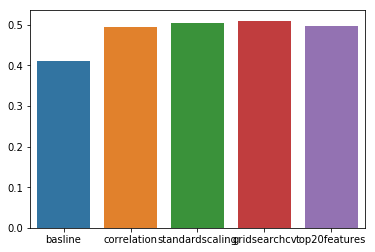

In [32]:
d={'basline':acc3,'correlation':acc,'standardscaling':acc1,'gridsearchcv':acc2,'top20features':acc4}
ax.set_title("Accuracies for various models")
ax.set_ylabel("Accuracy")
sns.barplot(x=list(d.keys()), y=list(d.values()))
